# Pacific Pilotage Authority Vessel Movement Analysis
*Analysis of Q1 2025 vessel movment data*

In [30]:
# Pandas for data manipulation and analysis
import pandas as pd

# Matplotlib & Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load Q1 2025 vessel movement data
df = pd.read_excel("data/2025 Q1 All Assignments.xlsx")
df

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark
0,POYANG,9721580,VRPM2,39790,24785,179.99,30.00,10.70,7.70,Bulker,ENGLISH BAY PILOT CHANGE (EBZ),SQUAMISH 1 (SQ1),2025-01-01 02:30:00,2025-01-01 06:21:00,NaT,NaT
1,CMA CGM INDIANAPOLIS,9953717,9HA5878,19157,71675,199.90,38.00,10.00,9.40,Car Carrier,BROTCHIE (SEA) (BRO),SANDHEADS (SHD),2025-01-01 04:00:00,2025-01-01 08:27:00,NaT,NaT
2,ASP AVANA,9783899,3E6696,108524,61183,243.79,42.00,14.81,12.30,Tanker,WESTRIDGE TERMINAL BERTH 3 (WR3),TANGO ALPHA PILOT CHANGE (TAZ),2025-01-01 06:30:00,2025-01-01 10:45:00,2025-01-01 06:30:00,2025-01-01 10:45:00
3,TARBET SPIRIT,9408322,C6BC6,107529,60205,243.80,42.00,14.92,8.80,Tanker,ENGLISH BAY PILOT CHANGE (EBZ),WESTRIDGE TERMINAL BERTH 3 (WR3),2025-01-01 06:30:00,2025-01-01 11:14:00,2025-01-01 06:30:00,2025-01-01 11:14:00
4,HIGH SEAS,9455703,D5AA6,49999,29841,183.31,32.20,12.96,7.55,Tanker,INDIAN ARM ANCHORAGE N (VHN),WESTRIDGE TERMINAL BERTH 1 (WR1),2025-01-01 07:00:00,2025-01-01 09:00:00,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,LILY FORTUNE,9860257,7KNS,91787,52307,235.00,43.00,12.88,8.15,Bulker,VANCOUVER HARBOUR ANCHORAGE C (VHC),ROBERTS BANK 2(WESTSHORE TERMINALS) (RB2),2025-03-31 22:00:00,2025-04-01 03:10:00,NaT,NaT
3590,BUENA VENTURA,9687215,3EEN,62915,35669,209.28,32.26,12.79,7.73,Bulker,ENGLISH BAY PILOT CHANGE (EBZ),BROTCHIE (SEA) (BRO),2025-03-31 22:00:00,2025-04-01 03:32:00,NaT,NaT
3591,OWUSU MARU,9888479,3FYB9,82506,43829,228.99,32.31,14.58,12.42,Bulker,ROBERTS BANK 2(WESTSHORE TERMINALS) (RB2),BROTCHIE (SEA) (BRO),2025-03-31 23:59:00,2025-04-01 04:12:00,NaT,NaT
3592,LAKE STARS,9868780,V7A2626,113848,61060,249.90,44.04,15.02,8.50,Tanker,BROTCHIE (SEA) (BRO),ENGLISH BAY PILOT CHANGE (EBZ),2025-03-31 23:00:00,2025-04-01 06:05:00,NaT,NaT


## Data Dictionary

- **Vessel** - Name of the vessel (e.g., POYANG, CMA CGM INDIANAPOLIS)
- **IMO** - International Maritime Organization number, unique ship identifier
- **Call Sign** - Unique radio communication identifier assigned by country of registration
- **DWT** - Deadweight Tonnage, maximum weight capacity in metric tonnes
- **GRT** - Gross Register Tonnage, internal volume measure
- **LOA** - Length Overall, total vessel length in meters
- **Beam** - Maximum vessel width in meters
- **S.Draft** - Summer Draft, maximum loading depth in summer conditions (meters)
- **Actual Draft** - Current depth vessel sits in water (meters)
- **Type** - Vessel classification (Bulker, Tanker, Passenger)
- **From Location** - Origin point for pilotage leg (e.g., ENGLISH BAY PILOT CHANGE (EBZ))
- **To Location** - Destination for pilotage leg (e.g., SQUAMISH 1 (SQ1))
- **First Pilot Ordered** - DateTime when first pilot was requested
- **First Pilot Debark** - DateTime when first pilot disembarked
- **Second Pilot Ordered** - DateTime for second pilot (if required for complex/long routes)
- **Second Pilot Debark** - DateTime when second pilot disembarked

In [32]:
# Examine dataset structure, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3594 entries, 0 to 3593
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Vessel                3594 non-null   object        
 1   IMO                   3594 non-null   int64         
 2   Call Sign             3589 non-null   object        
 3   DWT                   3594 non-null   int64         
 4   GRT                   3594 non-null   int64         
 5   LOA                   3594 non-null   float64       
 6   Beam                  3594 non-null   float64       
 7   S.Draft               3594 non-null   float64       
 8   Actual Draft          3594 non-null   float64       
 9   Type                  3594 non-null   object        
 10  From Location         3594 non-null   object        
 11  To Location           3594 non-null   object        
 12  First Pilot Ordered   3594 non-null   datetime64[ns]
 13  First Pilot Debark

## Initial Data Assessment

**Dataset Overview:**
- **Time Period:** January 1 - March 31, 2025
- **Total Records:** 3,594 vessel movements
- **Data Completeness:** All primary fields populated @ 100%
- **Secondary Pilot Usage:** 344 assignments (9.6% of total movements)

**Key Observations:**
- No missing values in primary fields
- Second pilot data only present for complex/long routes `(assumption)`
- Consistent datetime formatting across all timestamp fields

In [33]:
# Checking the IMO for unique values
df['IMO'].nunique()

789

In [34]:
# Grouping the IMO to check the most active vessels
df.groupby('IMO').size().sort_values(ascending=False)

IMO
9600592    40
9455703    34
9974319    29
9687215    17
9783007    16
           ..
9423724     1
9379935     1
9951903     1
9345805     1
7902283     1
Length: 789, dtype: int64

**Key Findings:**
- 789 unique vessels generated 3,594 total movements during Q1 2025

**Vessel Activity:**
1. Most active vessel `(IMO 9600592):` 40 movements
2. Second most active `(IMO 9455703):` 34 movements
3. Third most active `(IMO 9974319):` 29 movements

**Given the high activity levels, the top three vessels will be the focus of a deeper analysis to uncover further patterns**

In [35]:
# First, let's id the top 3 vessels
top_vessels = df.groupby('IMO').size().sort_values(ascending=False).head(3)
print(top_vessels)

IMO
9600592    40
9455703    34
9974319    29
dtype: int64


In [36]:
# Most active vessel
vessel_1 = df[df['IMO'] == 9600592]
print(vessel_1)

          Vessel      IMO Call Sign   DWT   GRT     LOA  Beam  S.Draft  \
16    NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
21    NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
99    NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
101   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
447   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
454   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
531   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
533   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
784   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
790   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
899   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
900   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68   
1150  NACC POROS  9600592      CQNG  8

In [37]:
# Configure pandas to display everything horizontally without wrapping, for clear understanding
pd.set_option('display.max_columns', None) # Show all columns, no column limit
pd.set_option('display.width', None) # Removes width limit
pd.set_option('display.max_colwidth', None) # Removes column width limit
pd.set_option('display.expand_frame_repr', False)  # Prevent df from wrapping across multiple lines

# Now print vessel data
vessel_1 = df[df['IMO'] == 9600592]
print(vessel_1)

          Vessel      IMO Call Sign   DWT   GRT     LOA  Beam  S.Draft  Actual Draft    Type           From Location             To Location First Pilot Ordered  First Pilot Debark Second Pilot Ordered Second Pilot Debark
16    NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68          5.51  Bulker    BROTCHIE (SEA) (BRO)         SANDHEADS (SHD) 2025-01-01 13:30:00 2025-01-01 19:00:00                  NaT                 NaT
21    NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68          5.51  Bulker         SANDHEADS (SHD)  LAFARGE RICHMOND (LFG) 2025-01-01 19:00:00 2025-01-01 21:15:00                  NaT                 NaT
99    NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68          7.20  Bulker  LAFARGE RICHMOND (LFG)         SANDHEADS (SHD) 2025-01-04 15:00:00 2025-01-04 16:40:00                  NaT                 NaT
101   NACC POROS  9600592      CQNG  8107  5566  119.95  16.8     6.68          7.20  Bulker  LAFARGE RICHMOND (

In [38]:
# Reset display options I've modified
pd.reset_option('display.max_columns')
pd.reset_option('display.width') 
pd.reset_option('display.max_colwidth')
pd.reset_option('display.expand_frame_repr')

# Can use reset all, but this may trigger a deprecation warning in newer versions of pandas
#pd.reset_option('all')

In [39]:
# Most Active Vessel
vessel_1 = df[df['IMO'] == 9600592]

print("Vessel Details:")
print(f"Name: {vessel_1['Vessel'].iloc[0]}") # Vessel Name
print(f"Type: {vessel_1['Type'].iloc[0]}") # Type of Vessel
print(f"DWT: {vessel_1['DWT'].iloc[0]:,} tonnes") # Tonnage of Vessel
print(f"LOA: {vessel_1['LOA'].iloc[0]}m") # Total vessel length in meters

# Check how many movements required a second pilot
second_pilot_count = vessel_1['Second Pilot Ordered'].notna().sum()
print(f"Movements requiring second pilot: {second_pilot_count} out of {len(vessel_1)}")

# Display the activity period for this vessel
print(f"Activity Period: {vessel_1['First Pilot Ordered'].min().date()} to {vessel_1['First Pilot Ordered'].max().date()}")

Vessel Details:
Name: NACC POROS
Type: Bulker
DWT: 8,107 tonnes
LOA: 119.95m
Movements requiring second pilot: 0 out of 40
Activity Period: 2025-01-01 to 2025-03-27


In [40]:
# Route patterns for NACC POROS
print("Top Routes:")
routes_1 = vessel_1.groupby(['From Location', 'To Location']).size().sort_values(ascending=False)
print(routes_1.head())

Top Routes:
From Location           To Location           
BROTCHIE (SEA) (BRO)    SANDHEADS (SHD)           10
LAFARGE RICHMOND (LFG)  BROTCHIE (SEA) (BRO)      10
                        SANDHEADS (SHD)           10
SANDHEADS (SHD)         LAFARGE RICHMOND (LFG)    10
dtype: int64


## Streamlined Approach

In [41]:
# Get the top 3 vessel data
vessel_1 = df[df['IMO'] == 9600592]
vessel_2 = df[df['IMO'] == 9455703]
vessel_3 = df[df['IMO'] == 9974319]

# Calculate vessel metrics
vessel_1_info = {
    'name': vessel_1['Vessel'].iloc[0],
    'type': vessel_1['Type'].iloc[0],
    'movements': len(vessel_1),
    'dwt': vessel_1['DWT'].iloc[0],
    'loa': vessel_1['LOA'].iloc[0],
    'second_pilot_count': vessel_1['Second Pilot Ordered'].notna().sum()
}

vessel_2_info = {
    'name': vessel_2['Vessel'].iloc[0],
    'type': vessel_2['Type'].iloc[0],
    'movements': len(vessel_2),
    'dwt': vessel_2['DWT'].iloc[0],
    'loa': vessel_2['LOA'].iloc[0],
    'second_pilot_count': vessel_2['Second Pilot Ordered'].notna().sum()
}

vessel_3_info = {
    'name': vessel_3['Vessel'].iloc[0],
    'type': vessel_3['Type'].iloc[0],
    'movements': len(vessel_3),
    'dwt': vessel_3['DWT'].iloc[0],
    'loa': vessel_3['LOA'].iloc[0],
    'second_pilot_count': vessel_3['Second Pilot Ordered'].notna().sum()
}

# Calculate route patterns for each vessel
vessel_1_routes = vessel_1.groupby(['From Location', 'To Location']).size().sort_values(ascending=False)
vessel_2_routes = vessel_2.groupby(['From Location', 'To Location']).size().sort_values(ascending=False)
vessel_3_routes = vessel_3.groupby(['From Location', 'To Location']).size().sort_values(ascending=False)

print("Top 3 Vessel Movments:")
print(f"Vessel 1: {vessel_1_info['name']} - {vessel_1_info['movements']} movements")
print(f"Vessel 2: {vessel_2_info['name']} - {vessel_2_info['movements']} movements") 
print(f"Vessel 3: {vessel_3_info['name']} - {vessel_3_info['movements']} movements")

Top 3 Vessel Movments:
Vessel 1: NACC POROS - 40 movements
Vessel 2: HIGH SEAS - 34 movements
Vessel 3: SEASPAN GARIBALDI - 29 movements


In [42]:
print(f"\n          {vessel_1_info['name']} Route Patterns")
print(f"Type: {vessel_1_info['type']} | DWT: {vessel_1_info['dwt']:,} tonnes | Second pilots needed: {vessel_1_info['second_pilot_count']} times")
print(vessel_1_routes.head())

print(f"\n          {vessel_2_info['name']} Route Patterns")
print(f"Type: {vessel_2_info['type']} | DWT: {vessel_2_info['dwt']:,} tonnes | Second pilots needed: {vessel_2_info['second_pilot_count']} times")
print(vessel_2_routes.head())

print(f"\n          {vessel_3_info['name']} Route Patterns")
print(f"Type: {vessel_3_info['type']} | DWT: {vessel_3_info['dwt']:,} tonnes | Second pilots needed: {vessel_3_info['second_pilot_count']} times")
print(vessel_3_routes.head())

# Route specialization analysis
vessel_1_specialization = (vessel_1_routes.iloc[0] / vessel_1_info['movements']) * 100 if len(vessel_1_routes) > 0 else 0
vessel_2_specialization = (vessel_2_routes.iloc[0] / vessel_2_info['movements']) * 100 if len(vessel_2_routes) > 0 else 0
vessel_3_specialization = (vessel_3_routes.iloc[0] / vessel_3_info['movements']) * 100 if len(vessel_3_routes) > 0 else 0

print(f"\n          Route Specialization Comparison")
print(f"{vessel_1_info['name']}: {vessel_1_specialization:.1f}% of movements on top route ({len(vessel_1_routes)} unique routes)")
print(f"{vessel_2_info['name']}: {vessel_2_specialization:.1f}% of movements on top route ({len(vessel_2_routes)} unique routes)")
print(f"{vessel_3_info['name']}: {vessel_3_specialization:.1f}% of movements on top route ({len(vessel_3_routes)} unique routes)")


          NACC POROS Route Patterns
Type: Bulker | DWT: 8,107 tonnes | Second pilots needed: 0 times
From Location           To Location           
BROTCHIE (SEA) (BRO)    SANDHEADS (SHD)           10
LAFARGE RICHMOND (LFG)  BROTCHIE (SEA) (BRO)      10
                        SANDHEADS (SHD)           10
SANDHEADS (SHD)         LAFARGE RICHMOND (LFG)    10
dtype: int64

          HIGH SEAS Route Patterns
Type: Tanker | DWT: 49,999 tonnes | Second pilots needed: 14 times
From Location                     To Location                     
BROTCHIE (SEA) (BRO)              ENGLISH BAY PILOT CHANGE (EBZ)      5
TANGO ALPHA PILOT CHANGE (TAZ)    RACE ROCKS SOUTH (RSZ)              5
ENGLISH BAY PILOT CHANGE (EBZ)    WESTRIDGE TERMINAL BERTH 3 (WR3)    3
WESTRIDGE TERMINAL BERTH 3 (WR3)  TANGO ALPHA PILOT CHANGE (TAZ)      3
WESTRIDGE TERMINAL BERTH 1 (WR1)  TANGO ALPHA PILOT CHANGE (TAZ)      2
dtype: int64

          SEASPAN GARIBALDI Route Patterns
Type: Tanker | DWT: 4,541 tonnes | Seco

In [43]:
# Calculate overall route patterns
route_frequency = df.groupby(['From Location', 'To Location']).size().sort_values(ascending=False)
top_routes = route_frequency.head(10)
total_unique_routes = len(route_frequency)

# Calculate location popularity
busiest_origins = df['From Location'].value_counts().head(10)
busiest_destinations = df['To Location'].value_counts().head(10)
total_unique_locations = len(set(df['From Location'].unique()) | set(df['To Location'].unique()))

print("Route Network Analysis:")
print(f"Total unique routes: {total_unique_routes}")
print(f"Total unique locations: {total_unique_locations}")
print(f"Most frequent route: {top_routes.index[0][0]} to {top_routes.index[0][1]} ({top_routes.iloc[0]} times)")

Route Network Analysis:
Total unique routes: 1083
Total unique locations: 192
Most frequent route: BROTCHIE (SEA) (BRO) to SANDHEADS (SHD) (122 times)


In [44]:
# Calculate pilot assignment durations
df['Pilot_Duration_Hours'] = (df['First Pilot Debark'] - df['First Pilot Ordered']).dt.total_seconds() / 3600

# Basic pilot duration statistics
pilot_stats = {
    'mean_duration': df['Pilot_Duration_Hours'].mean(),
    'median_duration': df['Pilot_Duration_Hours'].median(),
    'min_duration': df['Pilot_Duration_Hours'].min(),
    'max_duration': df['Pilot_Duration_Hours'].max(),
    'std_duration': df['Pilot_Duration_Hours'].std()
}

# Second pilot analysis - FIX: Use .copy() to avoid warning
second_pilot_df = df[df['Second Pilot Ordered'].notna()].copy()
second_pilot_stats = {
    'total_count': len(second_pilot_df),
    'percentage': (len(second_pilot_df) / len(df)) * 100,
    'top_routes': second_pilot_df.groupby(['From Location', 'To Location']).size().sort_values(ascending=False).head()
}

# Calculate second pilot durations - Now safe to modify
second_pilot_df['Second_Pilot_Duration_Hours'] = (second_pilot_df['Second Pilot Debark'] - second_pilot_df['Second Pilot Ordered']).dt.total_seconds() / 3600

second_pilot_duration_stats = {
    'mean_duration': second_pilot_df['Second_Pilot_Duration_Hours'].mean(),
    'median_duration': second_pilot_df['Second_Pilot_Duration_Hours'].median()
}

# Efficiency by vessel type
efficiency_by_type = df.groupby('Type')['Pilot_Duration_Hours'].agg(['count', 'mean', 'median', 'std']).round(2)

print("Pilot Efficiency Analysis")
print(f"Average pilot duration: {pilot_stats['mean_duration']:.1f} hours")
print(f"Median pilot duration: {pilot_stats['median_duration']:.1f} hours")
print(f"Duration range: {pilot_stats['min_duration']:.1f} - {pilot_stats['max_duration']:.1f} hours")
print(f"Standard deviation: {pilot_stats['std_duration']:.1f} hours")

print(f"\nSecond Pilot Analysis")
print(f"Second pilot usage: {second_pilot_stats['percentage']:.1f}% of movements ({second_pilot_stats['total_count']} total)")
print(f"Second pilot avg duration: {second_pilot_duration_stats['mean_duration']:.1f} hours")
print(f"Second pilot median duration: {second_pilot_duration_stats['median_duration']:.1f} hours")

print(f"\nRoutes Requiring Second Pilot (Top 5)")
for i, (route, count) in enumerate(second_pilot_stats['top_routes'].items(), 1):
    from_loc, to_loc = route
    percentage = (count / second_pilot_stats['total_count']) * 100
    print(f"{i}. {from_loc} → {to_loc}: {count} times ({percentage:.1f}%)")

print(f"\nEfficiency by Vessel Type")
print(efficiency_by_type)

Pilot Efficiency Analysis
Average pilot duration: 4.6 hours
Median pilot duration: 4.3 hours
Duration range: -2.2 - 54.2 hours
Standard deviation: 2.7 hours

Second Pilot Analysis
Second pilot usage: 9.6% of movements (344 total)
Second pilot avg duration: 5.8 hours
Second pilot median duration: 4.7 hours

Routes Requiring Second Pilot (Top 5)
1. TANGO ALPHA PILOT CHANGE (TAZ) → RACE ROCKS SOUTH (RSZ): 67 times (19.5%)
2. WESTRIDGE TERMINAL BERTH 3 (WR3) → TANGO ALPHA PILOT CHANGE (TAZ): 25 times (7.3%)
3. WESTRIDGE TERMINAL BERTH 2 (WR2) → TANGO ALPHA PILOT CHANGE (TAZ): 24 times (7.0%)
4. WESTRIDGE TERMINAL BERTH 1 (WR1) → TANGO ALPHA PILOT CHANGE (TAZ): 18 times (5.2%)
5. ENGLISH BAY PILOT CHANGE (EBZ) → INDIAN ARM ANCHORAGE L (VHL): 17 times (4.9%)

Efficiency by Vessel Type
             count  mean  median    std
Type                                   
Bulker        1827  4.88    4.83   2.88
Car Carrier    309  3.77    3.67   1.79
Cargo          186  5.13    4.58   3.53
Coast Guar

## Anomaly In Duration Range 
- Duration range: -2.2 - 54.2 hours
- `min_duration` is a negative value aka `-2.2`

## Likely Causes (Assumptions)
- Data Entry Error
- AM/PM confusion 12hr vs 24hr format mistakes
- Timezone issue - different system using different timezones
- Example: **CANPOTEX INSPIRE:** `March 21 00:45` to `March 20 22:30` (previous day)

In [45]:
# Extract the exact values
df[df['Pilot_Duration_Hours'] < 0]

,Vessel,IMO,Call Sign,DWT,GRT,LOA,Beam,S.Draft,Actual Draft,Type,From Location,To Location,First Pilot Ordered,First Pilot Debark,Second Pilot Ordered,Second Pilot Debark,Pilot_Duration_Hours
1403,ASL TRINITY,9780952,D5VD9,38607,23703,179.99,30.00,10.48,7.28,Cargo,STEWART ORE DOCK (Bulk Terminals) (STW),STEWART ANCHORAGE (STA),2025-02-07 17:00:00,2025-02-07 16:05:00,NaT,NaT,-0.916667
1793,MIDNIGHT SUN,9232278,WAHG,24917,65314,255.72,35.96,9.75,7.77,RORO,ROYAL ROADS ANCHORAGE A (RRA),BROTCHIE (SEA) (BRO),2025-02-15 15:30:00,2025-02-15 14:32:00,NaT,NaT,-0.966667
2142,BOREAL PIONEER,9945198,5LNO2,59206,51976,226.96,36.60,12.20,8.00,Tanker,PRINCE RUPERT ANCHORAGE 27 (P27),TRIGON PACIFIC TERMINALS (RIDLEY ISLAND COAL) ...,2025-02-24 22:45:00,2025-02-24 20:30:00,NaT,NaT,-2.250000
3156,CANPOTEX INSPIRE,9826500,VRSI3,81690,43646,229.00,32.26,14.51,7.00,Bulker,ENGLISH BAY ANCHORAGE 01 (E01),NANAIMO ANCHORAGE 5 (NA5),2025-03-21 00:45:00,2025-03-20 22:30:00,NaT,NaT,-2.250000


## Streamlined Approach Excluding Negative Durations

In [46]:
# Calculate pilot assignment durations
df['Pilot_Duration_Hours'] = (df['First Pilot Debark'] - df['First Pilot Ordered']).dt.total_seconds() / 3600

# Flag only negative durations as invalid
df['Duration_Valid'] = df['Pilot_Duration_Hours'] >= 0

# Basic pilot duration statistics (excluding negative durations)
pilot_stats = {
    'mean_duration': df[df['Duration_Valid']]['Pilot_Duration_Hours'].mean(),
    'median_duration': df[df['Duration_Valid']]['Pilot_Duration_Hours'].median(),
    'min_duration': df[df['Duration_Valid']]['Pilot_Duration_Hours'].min(),
    'max_duration': df[df['Duration_Valid']]['Pilot_Duration_Hours'].max(),
    'std_duration': df[df['Duration_Valid']]['Pilot_Duration_Hours'].std(),
    'invalid_count': (~df['Duration_Valid']).sum(),
    'invalid_pct': (~df['Duration_Valid']).sum() / len(df) * 100
}

# Second pilot analysis, using .copy() to avoid warning
second_pilot_df = df[df['Second Pilot Ordered'].notna()].copy()
second_pilot_stats = {
    'total_count': len(second_pilot_df),
    'percentage': (len(second_pilot_df) / len(df)) * 100,
    'top_routes': second_pilot_df.groupby(['From Location', 'To Location']).size().sort_values(ascending=False).head()
}

# Calculate second pilot durations - Now safe to modify
second_pilot_df['Second_Pilot_Duration_Hours'] = (second_pilot_df['Second Pilot Debark'] - second_pilot_df['Second Pilot Ordered']).dt.total_seconds() / 3600

second_pilot_duration_stats = {
    'mean_duration': second_pilot_df['Second_Pilot_Duration_Hours'].mean(),
    'median_duration': second_pilot_df['Second_Pilot_Duration_Hours'].median()
}

# Efficiency by vessel type (excluding negative durations)
efficiency_by_type = df[df['Duration_Valid']].groupby('Type')['Pilot_Duration_Hours'].agg(['count', 'mean', 'median', 'std']).round(2)

print("Pilot Efficiency Analysis")
print(f"Average pilot duration: {pilot_stats['mean_duration']:.1f} hours")
print(f"Median pilot duration: {pilot_stats['median_duration']:.1f} hours")
print(f"Duration range: {pilot_stats['min_duration']:.1f} - {pilot_stats['max_duration']:.1f} hours")
print(f"Standard deviation: {pilot_stats['std_duration']:.1f} hours")
print(f"Data quality: {pilot_stats['invalid_count']} negative duration records ({pilot_stats['invalid_pct']:.2f}%) excluded")

print(f"\nSecond Pilot Analysis")
print(f"Second pilot usage: {second_pilot_stats['percentage']:.1f}% of movements ({second_pilot_stats['total_count']} total)")
print(f"Second pilot avg duration: {second_pilot_duration_stats['mean_duration']:.1f} hours")
print(f"Second pilot median duration: {second_pilot_duration_stats['median_duration']:.1f} hours")

print(f"\nRoutes Requiring Second Pilot (Top 5)")
for i, (route, count) in enumerate(second_pilot_stats['top_routes'].items(), 1):
    from_loc, to_loc = route
    percentage = (count / second_pilot_stats['total_count']) * 100
    print(f"{i}. {from_loc} → {to_loc}: {count} times ({percentage:.1f}%)")

print(f"\nEfficiency by Vessel Type")
print(efficiency_by_type)

Pilot Efficiency Analysis
Average pilot duration: 4.6 hours
Median pilot duration: 4.4 hours
Duration range: 0.0 - 54.2 hours
Standard deviation: 2.7 hours
Data quality: 4 negative duration records (0.11%) excluded

Second Pilot Analysis
Second pilot usage: 9.6% of movements (344 total)
Second pilot avg duration: 5.8 hours
Second pilot median duration: 4.7 hours

Routes Requiring Second Pilot (Top 5)
1. TANGO ALPHA PILOT CHANGE (TAZ) → RACE ROCKS SOUTH (RSZ): 67 times (19.5%)
2. WESTRIDGE TERMINAL BERTH 3 (WR3) → TANGO ALPHA PILOT CHANGE (TAZ): 25 times (7.3%)
3. WESTRIDGE TERMINAL BERTH 2 (WR2) → TANGO ALPHA PILOT CHANGE (TAZ): 24 times (7.0%)
4. WESTRIDGE TERMINAL BERTH 1 (WR1) → TANGO ALPHA PILOT CHANGE (TAZ): 18 times (5.2%)
5. ENGLISH BAY PILOT CHANGE (EBZ) → INDIAN ARM ANCHORAGE L (VHL): 17 times (4.9%)

Efficiency by Vessel Type
             count  mean  median    std
Type                                   
Bulker        1826  4.89    4.83   2.88
Car Carrier    309  3.77    3.67

In [47]:
# Create time-based columns
df['Date'] = df['First Pilot Ordered'].dt.date
df['Hour'] = df['First Pilot Ordered'].dt.hour
df['Day_of_Week'] = df['First Pilot Ordered'].dt.day_name()
df['Month'] = df['First Pilot Ordered'].dt.month_name()

# Calculate traffic patterns
daily_traffic = df.groupby('Date').size()
hourly_traffic = df.groupby('Hour').size()
monthly_traffic = df.groupby('Month').size()

# Weekly traffic (reordered)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_traffic = df.groupby('Day_of_Week').size().reindex(day_order)

# Peak traffic analysis
traffic_stats = {
    'peak_day': daily_traffic.idxmax(),
    'peak_day_count': daily_traffic.max(),
    'lowest_day': daily_traffic.idxmin(),
    'lowest_day_count': daily_traffic.min(),
    'busiest_hour': hourly_traffic.idxmax(),
    'busiest_hour_count': hourly_traffic.max(),
    'quietest_hour': hourly_traffic.idxmin(),
    'quietest_hour_count': hourly_traffic.min()
}

# Vessel type trends
vessel_type_trends = df.groupby(['Month', 'Type']).size().unstack(fill_value=0)
overall_vessel_types = df['Type'].value_counts()

print("Traffic Patterns")
print(f"Peak traffic day: {traffic_stats['peak_day']} ({traffic_stats['peak_day_count']} movements)")
print(f"Busiest hour: {traffic_stats['busiest_hour']}:00 ({traffic_stats['busiest_hour_count']} movements)")

Traffic Patterns
Peak traffic day: 2025-01-06 (56 movements)
Busiest hour: 23:00 (322 movements)


## KPI's

In [48]:
# Set style
plt.style.use('default')
sns.set_palette("husl")

In [49]:
print("Operational Efficiency Metrics")

# Calculate total pilot hours (excluding negative durations)
total_pilot_hours = df[df['Pilot_Duration_Hours'] >= 0]['Pilot_Duration_Hours'].sum()
avg_daily_pilot_hours = total_pilot_hours / 90  # Q1 has 90 days

print(f"Total Pilot Hours: {total_pilot_hours:,.0f}")
print(f"Average Daily Pilot Hours: {avg_daily_pilot_hours:.1f}")
print(f"Average Pilot Duration: {df[df['Pilot_Duration_Hours'] >= 0]['Pilot_Duration_Hours'].mean():.1f} hours")

# Turnaround efficiency by location
location_efficiency = df[df['Pilot_Duration_Hours'] >= 0].groupby('To Location')['Pilot_Duration_Hours'].agg(['mean', 'count'])
top_5_locations = location_efficiency.nlargest(5, 'count')

print(f"\nTop 5 Destinations by Volume & Efficiency:")
for loc, row in top_5_locations.iterrows():
    print(f"  {loc}: {row['mean']:.1f}h avg ({row['count']} visits)")

Operational Efficiency Metrics
Total Pilot Hours: 16,685
Average Daily Pilot Hours: 185.4
Average Pilot Duration: 4.6 hours

Top 5 Destinations by Volume & Efficiency:
  BROTCHIE (SEA) (BRO): 6.2h avg (687.0 visits)
  SANDHEADS (SHD): 3.0h avg (313.0 visits)
  ENGLISH BAY PILOT CHANGE (EBZ): 5.8h avg (213.0 visits)
  TRIPLE ISLAND (TPL): 3.0h avg (136.0 visits)
  TANGO ALPHA PILOT CHANGE (TAZ): 4.4h avg (69.0 visits)


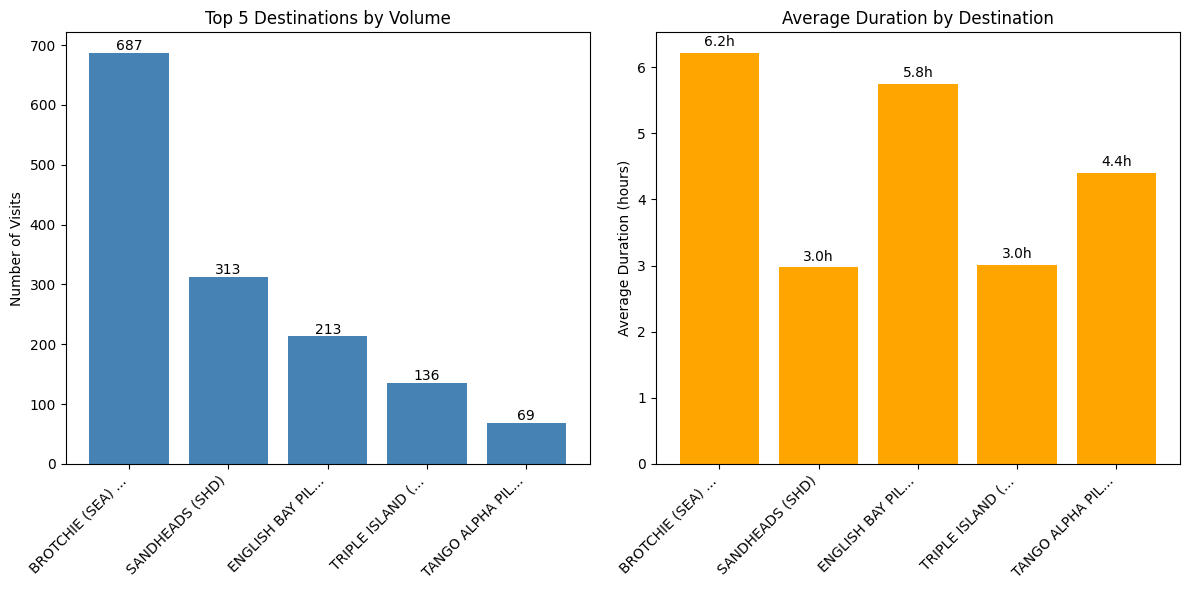

In [50]:
# Top 5 Destinations by Volume & Efficiency
plt.figure(figsize=(12, 6))
locations = top_5_locations.index
volumes = top_5_locations['count']
durations = top_5_locations['mean']

plt.subplot(1, 2, 1)
plt.bar(range(len(locations)), volumes, color='steelblue')
plt.title('Top 5 Destinations by Volume')
plt.ylabel('Number of Visits')
plt.xticks(range(len(locations)), [loc[:15] + '...' if len(loc) > 15 else loc for loc in locations], rotation=45, ha='right')
for i, v in enumerate(volumes):
    plt.text(i, v + 5, str(v), ha='center')

plt.subplot(1, 2, 2)
plt.bar(range(len(locations)), durations, color='orange')
plt.title('Average Duration by Destination')
plt.ylabel('Average Duration (hours)')
plt.xticks(range(len(locations)), [loc[:15] + '...' if len(loc) > 15 else loc for loc in locations], rotation=45, ha='right')
for i, v in enumerate(durations):
    plt.text(i, v + 0.1, f'{v:.1f}h', ha='center')

plt.tight_layout()
plt.show()

In [51]:
print("Safety & Complexity Indicators")

# Categorize vessels by size
df['Vessel_Size_Category'] = pd.cut(df['DWT'], 
                                    bins=[0, 10000, 50000, 100000, float('inf')],
                                    labels=['Small (<10k)', 'Medium (10-50k)', 'Large (50-100k)', 'Very Large (>100k)'])

# Second pilot usage by vessel size
second_pilot_by_size = df.groupby('Vessel_Size_Category', observed=False).agg({
    'Second Pilot Ordered': lambda x: x.notna().sum(),
    'IMO': 'count'
})
second_pilot_by_size['Second_Pilot_Rate'] = (second_pilot_by_size['Second Pilot Ordered'] / 
                                              second_pilot_by_size['IMO'] * 100)

print("Second Pilot Usage by Vessel Size:")
for size, rate in second_pilot_by_size['Second_Pilot_Rate'].items():
    count = second_pilot_by_size.loc[size, 'Second Pilot Ordered']
    total = second_pilot_by_size.loc[size, 'IMO']
    print(f"  {size}: {rate:.1f}% ({count}/{total} movements)")

# Night operations analysis
df['Hour'] = df['First Pilot Ordered'].dt.hour
df['Is_Night'] = df['Hour'].isin(list(range(18, 24)) + list(range(0, 6)))
night_operations = df['Is_Night'].sum()
night_operations_pct = (night_operations / len(df)) * 100

print(f"\nNight Operations (18:00-06:00): {night_operations} movements ({night_operations_pct:.1f}%)")

# High-risk routes (those most frequently requiring second pilots)
routes_needing_second = df[df['Second Pilot Ordered'].notna()].groupby(['From Location', 'To Location']).size()
print(f"\nTotal routes requiring second pilot: {len(routes_needing_second)} unique routes")

Safety & Complexity Indicators
Second Pilot Usage by Vessel Size:
  Small (<10k): 16.7% (20/120 movements)
  Medium (10-50k): 7.6% (86/1125 movements)
  Large (50-100k): 2.1% (35/1703 movements)
  Very Large (>100k): 31.4% (203/646 movements)

Night Operations (18:00-06:00): 1728 movements (48.1%)

Total routes requiring second pilot: 79 unique routes


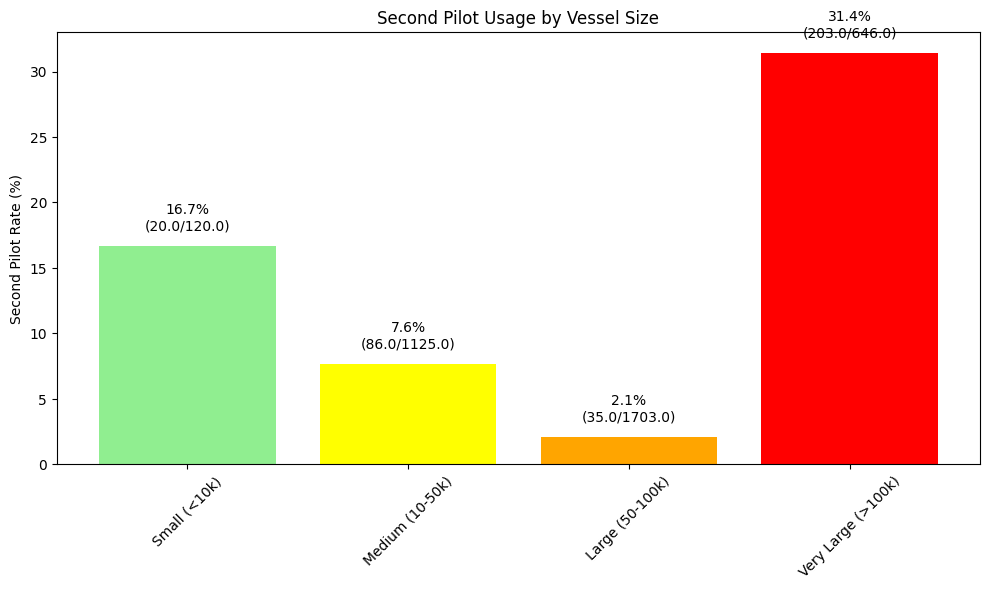

In [52]:
# Second Pilot Usage by Vessel Size
plt.figure(figsize=(10, 6))
sizes = second_pilot_by_size.index
rates = second_pilot_by_size['Second_Pilot_Rate']
colors = ['lightgreen', 'yellow', 'orange', 'red']

bars = plt.bar(sizes, rates, color=colors)
plt.title('Second Pilot Usage by Vessel Size')
plt.ylabel('Second Pilot Rate (%)')
plt.xticks(rotation=45)

for i, (bar, rate) in enumerate(zip(bars, rates)):
    count = second_pilot_by_size.iloc[i]['Second Pilot Ordered']
    total = second_pilot_by_size.iloc[i]['IMO']
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{rate:.1f}%\n({count}/{total})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [53]:
print("Commercial & Economic Indicators")

# Total cargo capacity moved
total_dwt_moved = df['DWT'].sum()
avg_vessel_size = df['DWT'].mean()

print(f"Total Cargo Capacity Moved: {total_dwt_moved:,.0f} DWT")
print(f"Average Vessel Size: {avg_vessel_size:,.0f} DWT")

# Vessel type analysis by size (revenue potential)
vessel_type_analysis = df.groupby('Type').agg({
    'DWT': ['mean', 'sum', 'count']
}).round(0)
vessel_type_analysis.columns = ['Avg_DWT', 'Total_DWT', 'Count']
vessel_type_analysis = vessel_type_analysis.sort_values('Total_DWT', ascending=False)

print("\nTop 5 Vessel Types by Total Capacity:")
for vtype, row in vessel_type_analysis.head(5).iterrows():
    pct_of_total = (row['Total_DWT'] / total_dwt_moved) * 100
    print(f"  {vtype}: {row['Total_DWT']:,.0f} DWT ({pct_of_total:.1f}% of total)")
    print(f"    - Average size: {row['Avg_DWT']:,.0f} DWT")
    print(f"    - Movements: {int(row['Count'])}")

# High-value vessel movements
high_value_threshold = 50000  # DWT
high_value_movements = len(df[df['DWT'] > high_value_threshold])
high_value_pct = (high_value_movements / len(df)) * 100

print(f"\nHigh-Value Vessels (>{high_value_threshold:,} DWT): {high_value_movements} ({high_value_pct:.1f}%)")

Commercial & Economic Indicators
Total Cargo Capacity Moved: 246,895,594 DWT
Average Vessel Size: 68,697 DWT

Top 5 Vessel Types by Total Capacity:
  Bulker: 140,936,063 DWT (57.1% of total)
    - Average size: 77,141 DWT
    - Movements: 1827
  Tanker: 49,196,900 DWT (19.9% of total)
    - Average size: 67,485 DWT
    - Movements: 729
  Container: 42,110,844 DWT (17.1% of total)
    - Average size: 88,098 DWT
    - Movements: 478
  Cargo: 7,536,331 DWT (3.1% of total)
    - Average size: 40,518 DWT
    - Movements: 186
  Car Carrier: 5,750,960 DWT (2.3% of total)
    - Average size: 18,612 DWT
    - Movements: 309

High-Value Vessels (>50,000 DWT): 2349 (65.4%)


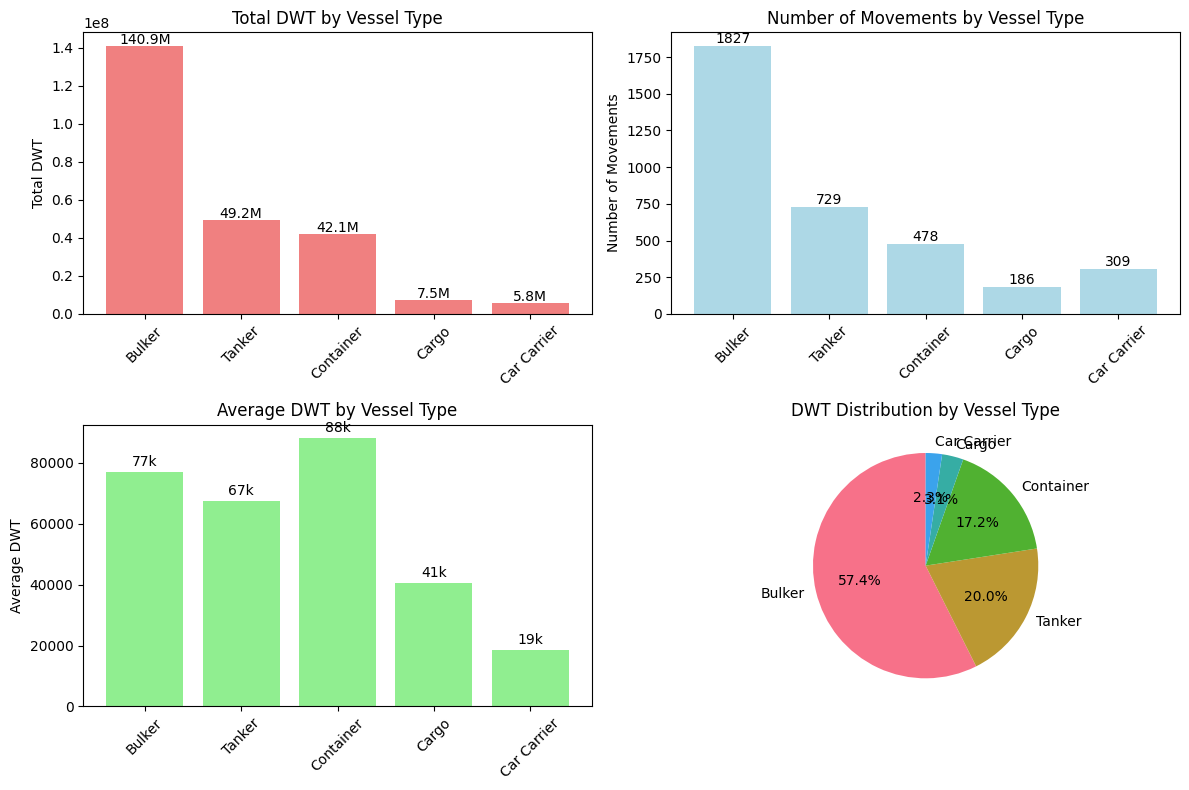

In [54]:
# Top 5 Vessel Types by Total Capacity
plt.figure(figsize=(12, 8))
top_5_types = vessel_type_analysis.head(5)

plt.subplot(2, 2, 1)
plt.bar(top_5_types.index, top_5_types['Total_DWT'], color='lightcoral')
plt.title('Total DWT by Vessel Type')
plt.ylabel('Total DWT')
plt.xticks(rotation=45)
for i, v in enumerate(top_5_types['Total_DWT']):
    plt.text(i, v + 1000000, f'{v/1000000:.1f}M', ha='center')

plt.subplot(2, 2, 2)
plt.bar(top_5_types.index, top_5_types['Count'], color='lightblue')
plt.title('Number of Movements by Vessel Type')
plt.ylabel('Number of Movements')
plt.xticks(rotation=45)
for i, v in enumerate(top_5_types['Count']):
    plt.text(i, v + 20, str(int(v)), ha='center')

plt.subplot(2, 2, 3)
plt.bar(top_5_types.index, top_5_types['Avg_DWT'], color='lightgreen')
plt.title('Average DWT by Vessel Type')
plt.ylabel('Average DWT')
plt.xticks(rotation=45)
for i, v in enumerate(top_5_types['Avg_DWT']):
    plt.text(i, v + 2000, f'{v/1000:.0f}k', ha='center')

plt.subplot(2, 2, 4)
# Pie chart for percentage distribution
pct_values = [(row['Total_DWT'] / total_dwt_moved) * 100 for _, row in top_5_types.iterrows()]
plt.pie(pct_values, labels=top_5_types.index, autopct='%1.1f%%', startangle=90)
plt.title('DWT Distribution by Vessel Type')

plt.tight_layout()
plt.show()

In [55]:
print("Performance Trends")

# Monthly movement trends
monthly_movements = df.groupby(df['First Pilot Ordered'].dt.month_name()).size()
month_order = ['January', 'February', 'March']
monthly_ordered = monthly_movements.reindex(month_order)

print("Monthly Movement Trends:")
for i, month in enumerate(month_order):
    count = monthly_ordered[month]
    daily_avg = count / (31 if month in ['January', 'March'] else 28)  # 2025 is not a leap year
    
    if i > 0:
        prev_count = monthly_ordered[month_order[i-1]]
        growth = ((count - prev_count) / prev_count) * 100
        print(f"  {month}: {count} movements ({daily_avg:.1f}/day, {growth:+.1f}% vs previous)")
    else:
        print(f"  {month}: {count} movements ({daily_avg:.1f}/day)")

# Day of week patterns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern = df['Day_of_Week'].value_counts().reindex(day_order)

print("\nWeekly Pattern:")
weekday_total = daily_pattern[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
weekend_total = daily_pattern[['Saturday', 'Sunday']].sum()
print(f"  Weekday movements: {weekday_total} ({weekday_total/(weekday_total+weekend_total)*100:.1f}%)")
print(f"  Weekend movements: {weekend_total} ({weekend_total/(weekday_total+weekend_total)*100:.1f}%)")

# Peak hour analysis
hourly_pattern = df.groupby('Hour').size()
peak_hours = hourly_pattern.nlargest(5)
off_peak_hours = hourly_pattern.nsmallest(5)

print("\nPeak Operating Hours:")
for hour, count in peak_hours.items():
    pct = (count / len(df)) * 100
    print(f"  {hour:02d}:00-{hour:02d}:59: {count} movements ({pct:.1f}%)")

print("\nQuietest Hours:")
for hour, count in off_peak_hours.items():
    pct = (count / len(df)) * 100
    print(f"  {hour:02d}:00-{hour:02d}:59: {count} movements ({pct:.1f}%)")

Performance Trends
Monthly Movement Trends:
  January: 1220 movements (39.4/day)
  February: 1099 movements (39.2/day, -9.9% vs previous)
  March: 1275 movements (41.1/day, +16.0% vs previous)

Weekly Pattern:
  Weekday movements: 2564 (71.3%)
  Weekend movements: 1030 (28.7%)

Peak Operating Hours:
  23:00-23:59: 322 movements (9.0%)
  06:00-06:59: 203 movements (5.6%)
  07:00-07:59: 195 movements (5.4%)
  08:00-08:59: 181 movements (5.0%)
  01:00-01:59: 176 movements (4.9%)

Quietest Hours:
  00:00-00:59: 39 movements (1.1%)
  19:00-19:59: 110 movements (3.1%)
  02:00-02:59: 115 movements (3.2%)
  15:00-15:59: 128 movements (3.6%)
  04:00-04:59: 129 movements (3.6%)


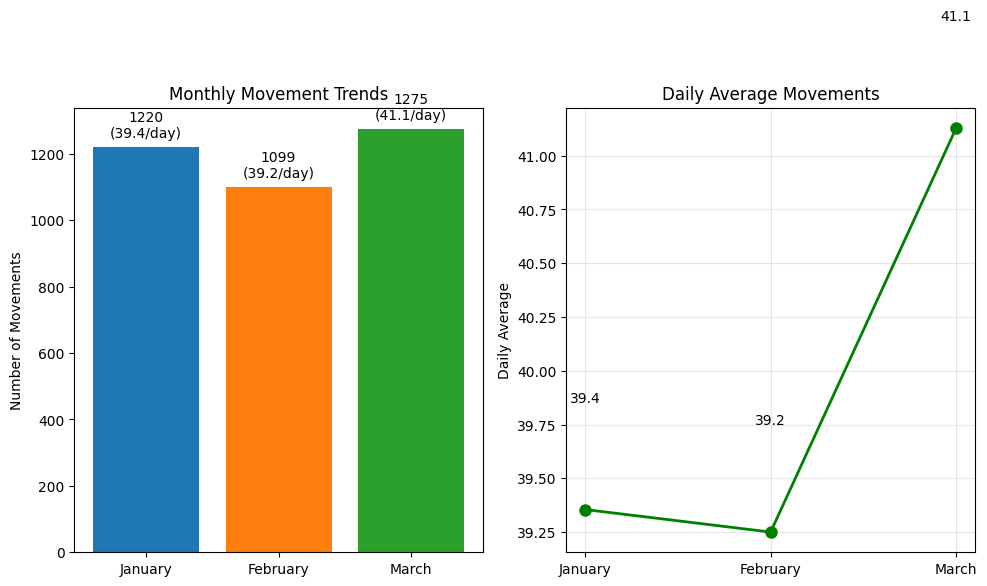

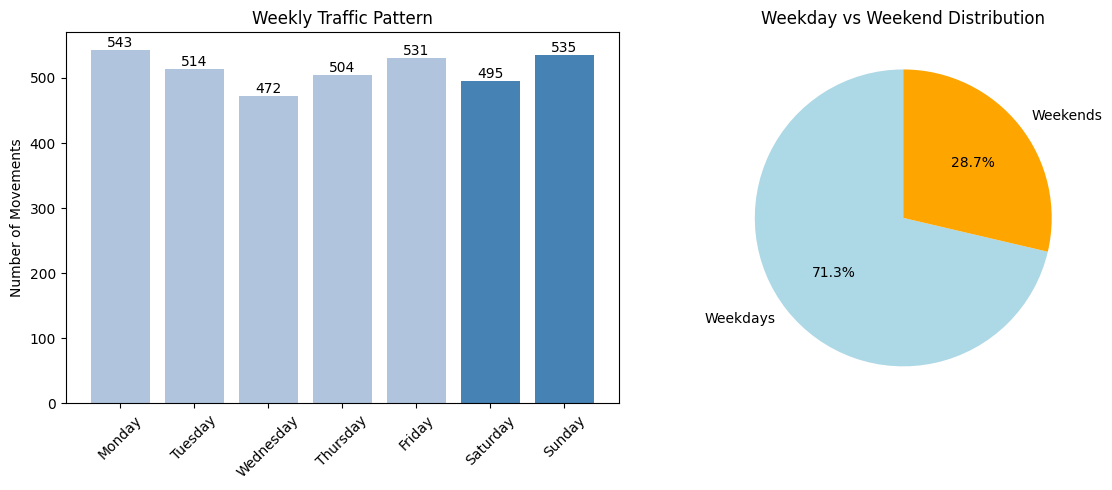

In [56]:
# Monthly, Weekly and Daily Movement Trends
plt.figure(figsize=(10, 6))
months = monthly_ordered.index
movements = monthly_ordered.values
daily_avgs = [movements[i] / (31 if month in ['January', 'March'] else 28) for i, month in enumerate(months)]

plt.subplot(1, 2, 1)
bars = plt.bar(months, movements, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Monthly Movement Trends')
plt.ylabel('Number of Movements')
for i, (bar, avg) in enumerate(zip(bars, daily_avgs)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{int(bar.get_height())}\n({avg:.1f}/day)', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.plot(months, daily_avgs, marker='o', linewidth=2, markersize=8, color='green')
plt.title('Daily Average Movements')
plt.ylabel('Daily Average')
plt.grid(True, alpha=0.3)
for i, avg in enumerate(daily_avgs):
    plt.text(i, avg + 0.5, f'{avg:.1f}', ha='center')

plt.tight_layout()
plt.show()

# 6. Weekly Pattern
plt.figure(figsize=(12, 5))
days = daily_pattern.index
day_movements = daily_pattern.values
colors = ['steelblue' if day in ['Saturday', 'Sunday'] else 'lightsteelblue' for day in days]

plt.subplot(1, 2, 1)
bars = plt.bar(days, day_movements, color=colors)
plt.title('Weekly Traffic Pattern')
plt.ylabel('Number of Movements')
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(int(bar.get_height())), ha='center')

plt.subplot(1, 2, 2)
# Weekday vs Weekend pie chart
weekday_total = daily_pattern[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
weekend_total = daily_pattern[['Saturday', 'Sunday']].sum()
plt.pie([weekday_total, weekend_total], 
        labels=['Weekdays', 'Weekends'], 
        autopct='%1.1f%%', 
        colors=['lightblue', 'orange'],
        startangle=90)
plt.title('Weekday vs Weekend Distribution')

plt.tight_layout()
plt.show()